In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
emp_data = pd.read_csv(r"D:\inter\Unemployment in India.csv" )

In [26]:
emp_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [28]:
emp_data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [30]:
emp_data.shape

(768, 7)

In [32]:
emp_data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [34]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [36]:
 emp_data.columns = emp_data.columns.str.strip()
emp_data["Date"] = pd.to_datetime(emp_data["Date"].str.strip(), format="%d-%m-%Y")
emp_data = emp_data.dropna()


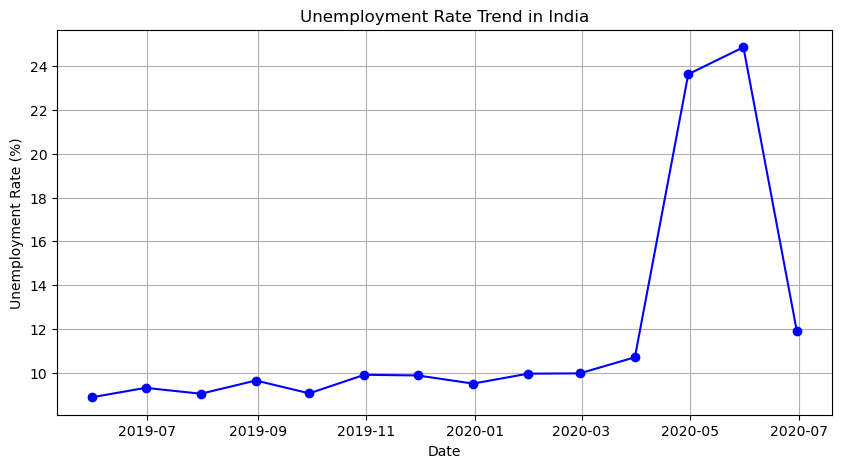

In [38]:
df_grouped = emp_data.groupby("Date")["Estimated Unemployment Rate (%)"].mean()
plt.figure(figsize=(10, 5))
plt.plot(df_grouped, marker='o', color='b')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend in India")
plt.grid(True)
plt.show()

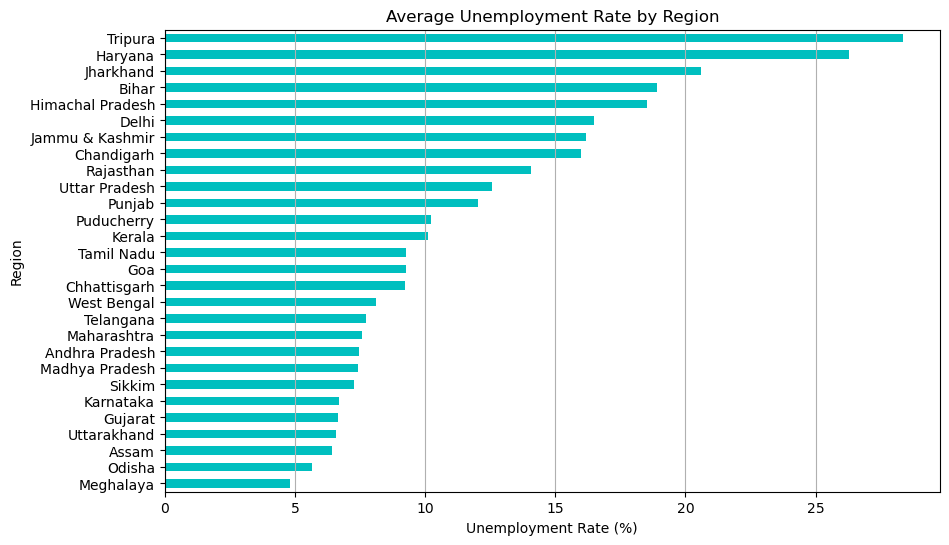

In [40]:
region_unemployment = emp_data.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values()
plt.figure(figsize=(10, 6))
region_unemployment.plot(kind='barh', color='c')
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.title("Average Unemployment Rate by Region")
plt.grid(axis='x')
plt.show()

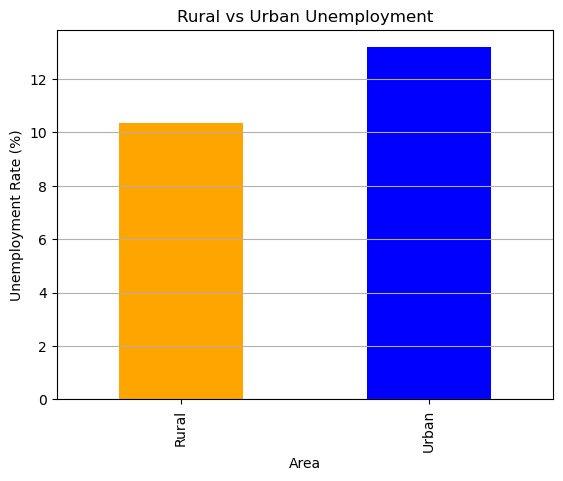

In [44]:
emp_data.groupby("Area")["Estimated Unemployment Rate (%)"].mean().plot(kind='bar', color=['orange', 'blue'])
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.title("Rural vs Urban Unemployment")
plt.grid(axis='y')
plt.show()

In [46]:
highest_unemployment = region_unemployment.idxmax(), region_unemployment.max()
lowest_unemployment = region_unemployment.idxmin(), region_unemployment.min()
print(f"Highest Unemployment: {highest_unemployment[0]} - {highest_unemployment[1]:.2f}%")
print(f"Lowest Unemployment: {lowest_unemployment[0]} - {lowest_unemployment[1]:.2f}%")


Highest Unemployment: Tripura - 28.35%
Lowest Unemployment: Meghalaya - 4.80%
